In [1]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
import copy

In [2]:
pubs_author_funder = pd.read_csv("..//..//data//dropbox//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
pubs_author_funder

,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3
...,...,...,...,...,...,...,...
12759123,65301180,[Pakistan],Not-Funded,89,2018,0.000,0
12759124,65301286,"[Singapore, Singapore]",Not-Funded,44,2017,0.264,1
12759125,65301288,[Iran],Not-Funded,96,2017,0.000,0
12759126,65301295,[Israel],Not-Funded,96,2017,0.000,0


In [4]:
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else 'Not-Funded')


### number of publication in each discipline

In [10]:
dis_cnt=pubs_author_funder.groupby("discipline").size().reset_index()
dis_cnt=dis_cnt.rename({0:'pub_cnt'},axis=1)
dis_cnt.head()

,discipline,pub_cnt
0,1,301926
1,2,244566
2,3,51899
3,4,101951
4,5,56852


### funding ratio of global science

In [18]:
fd_ratio = (pubs_author_funder[pubs_author_funder['funder_country']!='Not-Funded'].shape[0])/pubs_author_funder.shape[0]

In [21]:
dis_cnt['fd_exp']=dis_cnt['pub_cnt']*fd_ratio
dis_cnt.head()

,discipline,pub_cnt,fd_exp
0,1,301926,183150.558575
1,2,244566,148355.555694
2,3,51899,31482.319640
3,4,101951,61844.235333
4,5,56852,34486.846300


### calculate number of funded papers in each discipline

In [23]:
dis_fd=pubs_author_funder[pubs_author_funder.funder_country!='Not-Funded'].groupby("discipline").size().reset_index()
dis_fd=dis_fd.rename({0:'pub_actual'},axis=1)
dis_fd.head()

,discipline,pub_actual
0,1,161592
1,2,158638
2,3,25348
3,4,74235
4,5,35483


In [24]:
dis_cnt=dis_cnt.merge(dis_fd,on='discipline',how='left')
dis_cnt.head()

,discipline,pub_cnt,fd_exp,pub_actual
0,1,301926,183150.558575,161592
1,2,244566,148355.555694,158638
2,3,51899,31482.319640,25348
3,4,101951,61844.235333,74235
4,5,56852,34486.846300,35483


In [25]:
dis_cnt['act2exp']=dis_cnt['pub_actual']/dis_cnt['fd_exp']
dis_cnt.head()

,discipline,pub_cnt,fd_exp,pub_actual,act2exp
0,1,301926,183150.558575,161592,0.882291
1,2,244566,148355.555694,158638,1.069309
2,3,51899,31482.319640,25348,0.805150
3,4,101951,61844.235333,74235,1.200354
4,5,56852,34486.846300,35483,1.028885


In [42]:
top=dis_cnt.sort_values(by='act2exp',ascending=False).tail(15)
top

,discipline,pub_cnt,fd_exp,pub_actual,act2exp
77,General Engineering,13855,8404.546111,5457,0.649291
10,Anatomy & Morphology,13414,8137.032229,5282,0.649131
83,Nuclear Technology,46189,28018.591145,17515,0.625121
43,General & Internal Medicine,347287,210666.878758,131678,0.625053
60,Radiology & Nuclear Medicine,142102,86200.130743,53587,0.621658
56,Pediatrics,80621,48905.298593,29029,0.593576
65,Veterinary Medicine,125200,75947.251756,44726,0.588909
38,Dentistry,78147,47404.551781,26186,0.552394
39,Dermatology & Venerial Disease,62293,37787.397393,18040,0.477408
64,Urology,72515,43988.138667,20861,0.474241


In [28]:
discode=pd.read_csv("..//..//data//dropbox//Data/RawData//discipline_code.csv")
discode = discode.set_index('Code_Discipline')['ESpecialite'].to_dict()
dis_cnt=dis_cnt.replace({'discipline':discode})


In [49]:
top = dis_cnt.sort_values(by='act2exp',ascending=False).head(15)
tail = dis_cnt.sort_values(by='act2exp',ascending=False).tail(15)
plot_data = pd.concat([top,tail])
plot_data['xaxis']=plot_data['act2exp'].apply(lambda x:x if x>1 else x*(-1))
plot_data.head()

,discipline,pub_cnt,fd_exp,pub_actual,act2exp,xaxis
66,Astronomy & Astrophysics,120015,72801.992168,96508,1.325623,1.325623
16,Genetics & Heredity,163497,99178.496967,128442,1.295059,1.295059
11,Biochemistry & Molecular Biology,393559,238735.818321,307157,1.286598,1.286598
14,Cellular Biology Cytology & Histology,118292,71756.807545,91658,1.277342,1.277342
29,Organic Chemistry,184958,112196.899283,142402,1.269215,1.269215


Text(0, 0.5, '')

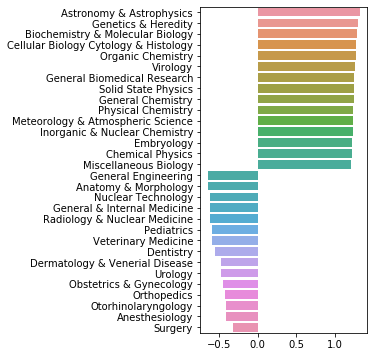

In [57]:
fig, ax=plt.subplots(figsize=(3,6))
sns.barplot(x='xaxis',y='discipline',data=plot_data)
plt.xlabel("")
plt.ylabel("")

### use fractional method to distribute paper into countries

In [60]:
cntry_ath = pubs_author_funder[['id','author_country']]
cntry_ath['author_country']=cntry_ath['author_country'].apply(lambda x:list(set(x)))
cntry_ath.head()

<ipython-input-60-ca0693be4084>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cntry_ath['author_country']=cntry_ath['author_country'].apply(lambda x:list(set(x)))


,id,author_country
0,30507292,[Turkey]
1,30574690,"[France, United States]"
2,30574691,[Russia]
3,30585095,[Spain]
4,30585097,"[Spain, Germany]"


In [65]:
def cntry_byfractionalize(data,colname):
    cntry_frac_list=[]
    for index, row in data.iterrows():
        cntrylist=row[colname]
        cntry_num=len(row[colname])
        for item in cntrylist:
            cntry_frac_list.append([item,1/cntry_num])
    return cntry_frac_list      

In [72]:
cntry_fd = pubs_author_funder[['id','funder_country']]
cntry_fd = cntry_fd[cntry_fd.funder_country!='Not-Funded']
cntry_fd['funder_country']=cntry_fd['funder_country'].apply(lambda x:list(set(x)))
cntry_fd.head()

,id,funder_country
0,30507292,[Turkey]
1,30574690,[United States]
2,30574691,[Russia]
3,30585095,[Spain]
4,30585097,[Spain]


In [ ]:
author_frac = cntry_byfractionalize(cntry_ath,'author_country')

In [75]:
fund_frac = cntry_byfractionalize(cntry_fd,'funder_country')

In [80]:
author_frac_df=pd.DataFrame(author_frac,columns=['cntry','author_frac'])
author_frac_df=author_frac_df.groupby('cntry')['author_frac'].sum().reset_index()
author_frac_df.head()

,cntry,author_frac
0,Afghanistan,168.091579
1,Albania,798.924129
2,Algeria,16759.227321
3,Andorra,29.108059
4,Angola,188.663908


In [81]:
fund_frac_df=pd.DataFrame(fund_frac,columns=['cntry','fund_frac'])
fund_frac_df=fund_frac_df.groupby('cntry')['fund_frac'].sum().reset_index()
fund_frac_df.head()

,cntry,fund_frac
0,Afghanistan,3.258202
1,Albania,19.466667
2,Algeria,1881.468890
3,Andorra,30.916667
4,Angola,25.833333


In [82]:
cntry_frac=author_frac_df.merge(fund_frac_df,on='cntry',how='inner')
cntry_frac.head()

,cntry,author_frac,fund_frac
0,Afghanistan,168.091579,3.258202
1,Albania,798.924129,19.466667
2,Algeria,16759.227321,1881.468890
3,Andorra,29.108059,30.916667
4,Angola,188.663908,25.833333


In [83]:
cntry_frac['fund_exp']=cntry_frac['author_frac']*fd_ratio
cntry_frac.head()

,cntry,author_frac,fund_frac,fund_exp
0,Afghanistan,168.091579,3.258202,101.965603
1,Albania,798.924129,19.466667,484.633323
2,Algeria,16759.227321,1881.468890,10166.272017
3,Andorra,29.108059,30.916667,17.657165
4,Angola,188.663908,25.833333,114.444931


In [87]:
cntry_frac=cntry_frac[cntry_frac.author_frac>=10000]
cntry_frac.head()

,cntry,author_frac,fund_frac,fund_exp,act2exp
2,Algeria,16759.227321,1881.468890,10166.272017,0.185070
5,Argentina,57051.153380,36776.284081,34607.654223,1.062663
7,Australia,291099.529650,162505.470582,176583.141089,0.920277
8,Austria,74126.782195,32421.675307,44965.857742,0.721029
14,Belgium,101281.226564,52643.354362,61437.945783,0.856854


In [88]:
cntry_frac['act2exp']=cntry_frac['fund_frac']/cntry_frac['fund_exp']
cntry_frac.head()

,cntry,author_frac,fund_frac,fund_exp,act2exp
2,Algeria,16759.227321,1881.468890,10166.272017,0.185070
5,Argentina,57051.153380,36776.284081,34607.654223,1.062663
7,Australia,291099.529650,162505.470582,176583.141089,0.920277
8,Austria,74126.782195,32421.675307,44965.857742,0.721029
14,Belgium,101281.226564,52643.354362,61437.945783,0.856854


In [90]:
cntry_frac.sort_values(by='act2exp',ascending=False).head()

,cntry,author_frac,fund_frac,fund_exp,act2exp
35,China,2.047269e+06,1.783911e+06,1.241889e+06,1.436450
156,South Korea,4.104047e+05,3.012228e+05,2.489545e+05,1.209951
43,Czech Republic,7.010110e+04,5.128589e+04,4.252385e+04,1.206050
170,Thailand,4.622984e+04,3.187472e+04,2.804336e+04,1.136623
167,Taiwan,1.937080e+05,1.328382e+05,1.175047e+05,1.130493


In [91]:
cntry_top = cntry_frac.sort_values(by='act2exp',ascending=False).head(15)
cntry_tail = cntry_frac.sort_values(by='act2exp',ascending=False).tail(15)
cntry_plot = pd.concat([cntry_top,cntry_tail])
cntry_plot['xaxis']=cntry_plot['act2exp'].apply(lambda x:x if x>1 else x*(-1))
cntry_plot.head()

,cntry,author_frac,fund_frac,fund_exp,act2exp,xaxis
35,China,2.047269e+06,1.783911e+06,1.241889e+06,1.436450,1.436450
156,South Korea,4.104047e+05,3.012228e+05,2.489545e+05,1.209951,1.209951
43,Czech Republic,7.010110e+04,5.128589e+04,4.252385e+04,1.206050,1.206050
170,Thailand,4.622984e+04,3.187472e+04,2.804336e+04,1.136623,1.136623
167,Taiwan,1.937080e+05,1.328382e+05,1.175047e+05,1.130493,1.130493


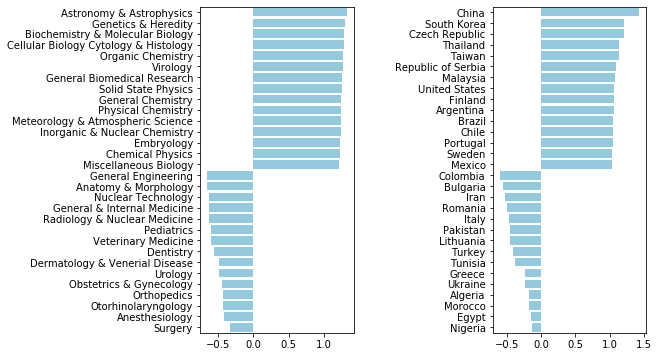

In [112]:
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(8,6))
plt.subplots_adjust(wspace=0.9)
sns.barplot(x='xaxis',y='discipline',data=plot_data,ax=ax[0],color='skyblue')
sns.barplot(x='xaxis',y='cntry',data=cntry_plot,ax=ax[1],color='skyblue')
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_ylabel("")
ax[1].set_ylabel("")
plt.savefig("Ration_Dis_Cntry.png",bbox_inches="tight")